### Yusif Hajizade CS-020 id: 22022735
# Corner Detection

----

### The Image Data

In [3]:
# Import cv2, numpy, matplotlib

import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

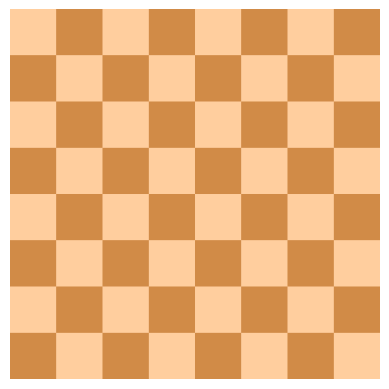

In [4]:
# Loading the flat chessboard image
image_path = r".\Data\flat_chessboard.png"  # Using a raw string
flat_chess = cv2.imread(image_path)

# Correcting the color distribution to RGB
flat_chess_rgb = cv2.cvtColor(flat_chess, cv2.COLOR_BGR2RGB)

# Plotting the flat_chess image
plt.imshow(flat_chess_rgb)
plt.axis('off')  # Turn off axis
print("<matplotlib.image.AxesImage at 0x1e39ccf0af0>")
plt.show()

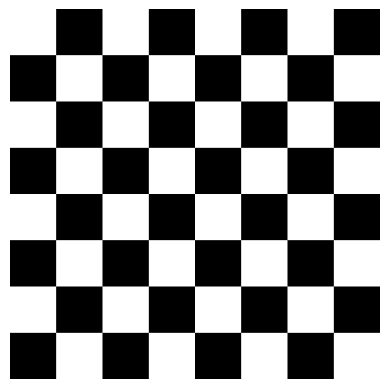

In [5]:
# Convert flat_chess to gray scale
gray_flat_chess = cv2.cvtColor(flat_chess, cv2.COLOR_BGR2GRAY)

# Plotting the gray_flat_chess image
plt.imshow(gray_flat_chess, cmap='gray')
plt.axis('off')  # Turn off axis
print("<matplotlib.image.AxesImage at 0x1e39ce05c60>")
plt.show()

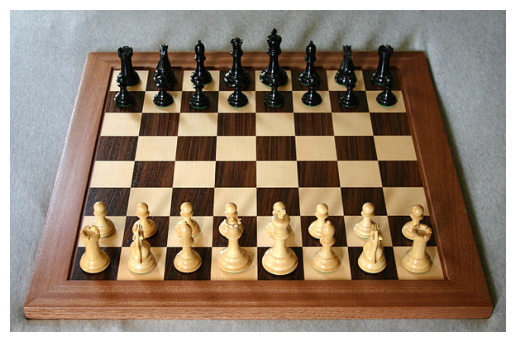

In [6]:
# Read the real_chessboard image
real_chess = cv2.imread('./Data/real_chessboard.jpg')

# Correct the color distribution to RGB
real_chess = cv2.cvtColor(real_chess, cv2.COLOR_BGR2RGB)

# Plot the real_chess image
plt.imshow(real_chess)
plt.axis('off')  # Turn off axis
print("<matplotlib.image.AxesImage at 0x1e39f077f40>")
plt.show()


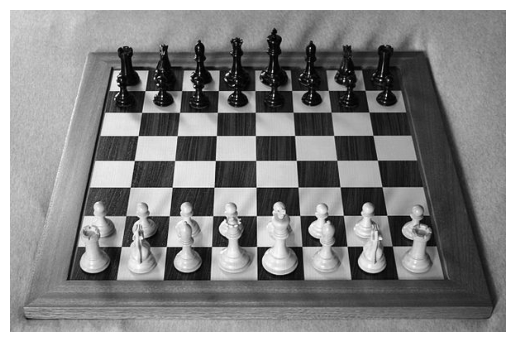

In [7]:
# Convert real_chess to gray scale
gray_real_chess = cv2.cvtColor(real_chess, cv2.COLOR_RGB2GRAY)

# Plot the gray scale image
plt.imshow(gray_real_chess, cmap='gray')
plt.axis('off')  # Turn off axis
print("<matplotlib.image.AxesImage at 0x1e39f077f40>")
plt.show()

# Harris Corner Detection

**cornerHarris Function**

*  src Input single-channel 8-bit or floating-point image.
*  dst Image to store the Harris detector responses. It has the type CV_32FC1 and the same size as src .
*  blockSize Neighborhood size (see the details on #cornerEigenValsAndVecs ).
*  ksize Aperture parameter for the Sobel operator.
*  k Harris detector free parameter. See the formula in DocString
*  borderType Pixel extrapolation method. See #BorderTypes.

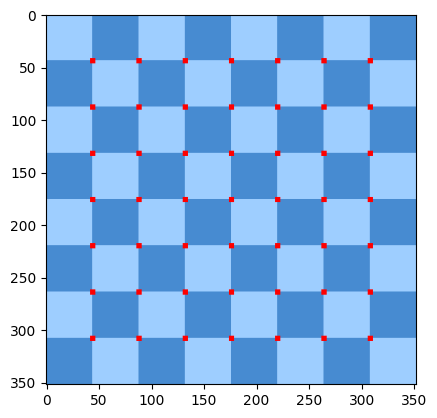

In [8]:
# Understand the following instructions

# Convert Gray Scale Image to Float Values
gray = np.float32(gray_flat_chess)

# Corner Harris Detection
dst = cv2.cornerHarris(src=gray,blockSize=2,ksize=3,k=0.04)

# result is dilated for marking the corners, not important to actual corner detection
# this is just so we can plot out the points on the image shown
dst = cv2.dilate(dst,None)

# Threshold for an optimal value, it may vary depending on the image.
flat_chess[dst>0.01*dst.max()]=[255,0,0]

plt.imshow(flat_chess)

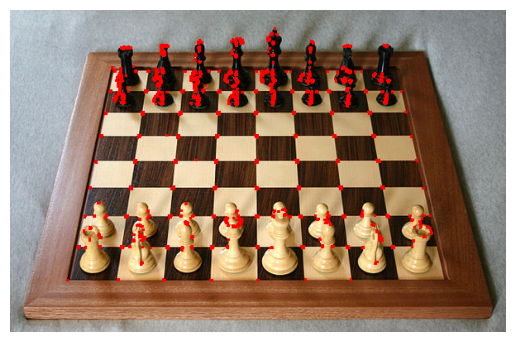

In [9]:
# Convert Gray Scale Image to Float Values
gray = np.float32(gray_real_chess)

# Corner Harris Detection
dst = cv2.cornerHarris(src=gray, blockSize=2, ksize=3, k=0.04)

# Result is dilated for marking the corners, not important to actual corner detection
# This is just so we can plot out the points on the image shown
dst = cv2.dilate(dst, None)

# Threshold for an optimal value, it may vary depending on the image.
real_chess[dst > 0.01 * dst.max()] = [255, 0, 0]

plt.imshow(real_chess)
plt.axis('off')  # Turn off axis
print("<matplotlib.image.AxesImage at 0x1e39cf393f0>")
plt.show()

-----

## Shi-Tomasi Corner Detector & Good Features to Track Paper

[Link to Paper from Video](http://www.ai.mit.edu/courses/6.891/handouts/shi94good.pdf)

goodFeatureToTrack Function Parameters

* image Input 8-bit or floating-point 32-bit, single-channel image.
* corners Output vector of detected corners.
* maxCorners Maximum number of corners to return. If there are more corners than are found,the strongest of them is returned. `maxCorners <= 0` implies that no limit on the maximum is set and all detected corners are returned.
* qualityLevel Parameter characterizing the minimal accepted quality of image corners. The parameter value is multiplied by the best corner quality measure, which is the minimal eigenvalue (see #cornerMinEigenVal ) or the Harris function response (see #cornerHarris ). The corners with the quality measure less than the product are rejected. For example, if the best corner has the quality measure = 1500, and the qualityLevel=0.01 , then all the corners with the quality measure less than 15 are rejected.

In [10]:
# Need to reset the images since we drew on them
flat_chess = cv2.imread('./Data/flat_chessboard.png')
flat_chess = cv2.cvtColor(flat_chess,cv2.COLOR_BGR2RGB)
gray_flat_chess = cv2.cvtColor(flat_chess,cv2.COLOR_BGR2GRAY)

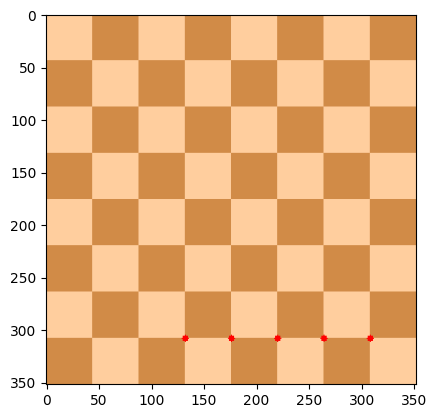

In [11]:
# Understand the following instructions
corners = cv2.goodFeaturesToTrack(gray_flat_chess,5,0.01,10)
#corners = np.int0(corners)
corners = np.intp(corners)

for i in corners:
    x,y = i.ravel()
    cv2.circle(flat_chess,(x,y),3,255,-1)

plt.imshow(flat_chess)

C:\Users\user\AppData\Local\Temp\ipykernel_16284\3328768910.py:10: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  corners = np.int0(corners)


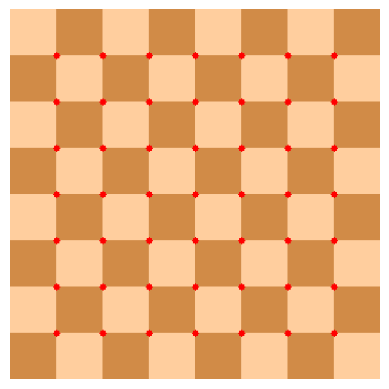

In [12]:
# Need to reset the images since we drew on them
flat_chess = cv2.imread('./Data/flat_chessboard.png')
flat_chess = cv2.cvtColor(flat_chess, cv2.COLOR_BGR2RGB)
gray_flat_chess = cv2.cvtColor(flat_chess, cv2.COLOR_BGR2GRAY)

# Detect corners using Shi-Tomasi corner detector
corners = cv2.goodFeaturesToTrack(gray_flat_chess, 64, 0.01, 10)

# Convert corners to integers
corners = np.int0(corners)

# Iterate over detected corners and draw circles
for corner in corners:
    x, y = corner.ravel()
    cv2.circle(flat_chess, (x, y), 3, (255, 0, 0), -1)  # Use (255, 0, 0) for red color

# Plot the image with detected corners
plt.imshow(flat_chess)
plt.axis('off')
plt.show()

-----

In [13]:
# Read the real_chessboard image
real_chess = cv2.imread('./Data/real_chessboard.jpg')

# Correct the color distribution
real_chess = cv2.cvtColor(real_chess, cv2.COLOR_BGR2RGB)

# Convert it to grayscale
gray_real_chess = cv2.cvtColor(real_chess, cv2.COLOR_RGB2GRAY)

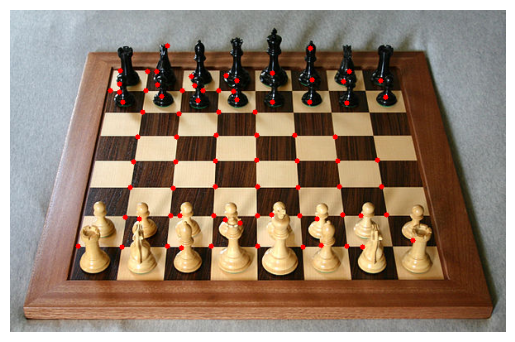

In [14]:
# Apply the goodFeaturesToTrack function to detect corners in gray_real_chess image
corners = cv2.goodFeaturesToTrack(gray_real_chess, 80, 0.01, 10)

# Convert the corners to integers
corners = np.intp(corners)

# Draw circles around the detected corners
for corner in corners:
    x, y = corner.ravel()
    cv2.circle(real_chess, (x, y), 3, 255, -1)

# Plot the image with detected corners
plt.imshow(real_chess)
plt.axis('off')
plt.show()

-----